# MultiLayeredPerceptron

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
dataset = load_iris()

x = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
y = dataset.target

In [3]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

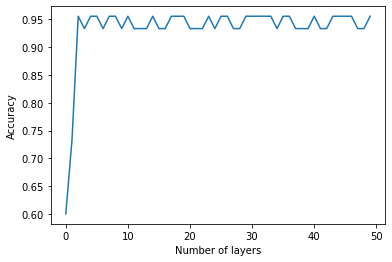

In [22]:
acc = []

for i in range(50):
    mlp = MLPClassifier(max_iter = 3000, hidden_layer_sizes = i+1)
    mlp.fit(x_train, y_train)
    acc.append(mlp.score(x_test, y_test))
    
plt.xlabel("Number of layers")
plt.ylabel("Accuracy")
plt.plot(acc)

In [23]:
mlp = MLPClassifier(max_iter = 3000, hidden_layer_sizes = np.argmax(acc))
mlp.__dict__
np.argmax(acc)

2

In [24]:
mlp.fit(x_train, y_train)
mlp.score(x_test, y_test)

0.9555555555555556

In [25]:
pred = mlp.predict(x_test)

In [26]:
print(confusion_matrix(y_test, pred))

[[15  0  0]
 [ 0 10  2]
 [ 0  0 18]]


In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.83      0.91        12
           2       0.90      1.00      0.95        18

    accuracy                           0.96        45
   macro avg       0.97      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45

